In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning

The `schools.csv` file is the cleaned data. However I copied the code I used to clean data along with the logic below for reference.

In [ ]:
# # Function to fill 'Unknown' or 'TBD' in 'Fluency' with matching 'ANON_ID' values
# def fill_fluency(row):
#     if row['Fluency'] in ['Unknown', 'TBD']:
#         # Find the first non-null value of 'Fluency' for the same 'ANON_ID'
#         matching_value = schools[(schools['ANON_ID'] == row['ANON_ID']) & (schools['Fluency'].notna()) & (~schools['Fluency'].isin(['Unknown', 'TBD']))]

#         # If there is a match, return its 'Fluency' value; otherwise, return the original 'Fluency'
#         if not matching_value.empty:
#             return matching_value.iloc[0]['Fluency']
#     return row['Fluency']
# def fill_SED(row):
#     if row['SED'] == 'Unknown':
#         # Find the first non-null value of 'SED' for the same 'ANON_ID'
#         matching_value = schools[(schools['ANON_ID'] == row['ANON_ID']) & (schools['SED'].notna()) & (~schools['SED'].isin(['Unknown']))]

#         # If there is a match, return its 'SED' value; otherwise, return the original 'SED'
#         if not matching_value.empty:
#             return matching_value.iloc[0]['SED']
#     return row['SED']
# # Add age (school year - birthdate) column
# def calculate_age(df):
#   df['Birthdate'] = pd.to_datetime(df['Birthdate'])
#   end_year = df['Year'].str.split('-').str[0].astype(int)
#   year = end_year.apply(lambda x: 2000 + x)
#   df['Age'] = year - df['Birthdate'].dt.year
#   return df

# schools = calculate_age(schools)
# # Susp
# schools['Susp'] = schools['Susp'].fillna(0)
# # Gender
# schools['Gen'] = schools['Gen'].replace('m', 'M')
# # Fluency
# schools['Fluency'] = schools.apply(fill_fluency, axis=1).replace('TBD', 'Unknown')
# # SED
# schools['SED'] = schools.apply(fill_SED, axis=1)
# # fill missing AttRate, DaysEnr, DaysAbs all 0
# schools.fillna(0, inplace=True)

# Data Preparation

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ONGB_Wizearly 2024 Fall Interns /ONGB_Wizearly Interns B/Dinh_Lan/schools.csv')
data.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,ChroAbs,Age
0,338,2003-07-21,F,Latino,RFEP,Not Special Ed,9,0.9889,180.0,2.0,0.0,3.65,Unknown,Castlemont,17-18,0,14
1,340,2003-03-31,M,Latino,EL,Not Special Ed,9,0.8389,180.0,29.0,2.0,0.06,Unknown,Castlemont,17-18,1,14
2,478,2003-09-06,F,Multiple Ethnicity,EO,Special Ed,9,0.7263,179.0,49.0,1.0,0.24,Unknown,Castlemont,17-18,1,14
3,686,2000-04-02,M,Latino,EL,Not Special Ed,12,0.9611,180.0,7.0,0.0,2.00,Unknown,Castlemont,17-18,0,17
4,693,2002-03-28,F,Latino,RFEP,Not Special Ed,10,0.9889,180.0,2.0,0.0,2.59,SED,Castlemont,17-18,0,15


In [ ]:
# Filter dataset to only include rows from 2023-2024
data_23_24 = data[data['Year'] == '23-24']

# Find all rows with ANON_IDs present in 2023-2024 across all years
anon_ids_23_24 = data_23_24['ANON_ID'].unique()
past_data = data[data['ANON_ID'].isin(anon_ids_23_24) & (data['Year'] != '23-24')]
past_data['School'].unique()

array(['Castlemont', 'East Oakland PRIDE', 'Elmhurst United', 'MLK',
       'McClymonds', 'Prescott', 'WOMS'], dtype=object)

In [ ]:
# Pivot the past data to create columns for each year for the selected variables
columns_to_pivot = ['AttRate', 'DaysEnr', 'DaysAbs', 'Susp', 'CurrWeightedTotGPA']
pivoted_data = past_data.pivot(index='ANON_ID', columns='Year', values=columns_to_pivot)

# Flatten the multi-index columns in the pivoted data
pivoted_data.columns = ['_'.join(col).strip() for col in pivoted_data.columns.values]
pivoted_data.reset_index(inplace=True)
pivoted_data.fillna(0, inplace=True)
pivoted_data.head()

,ANON_ID,AttRate_17-18,AttRate_18-19,AttRate_19-20,AttRate_20-21,AttRate_21-22,AttRate_22-23,DaysEnr_17-18,DaysEnr_18-19,DaysEnr_19-20,...,Susp_19-20,Susp_20-21,Susp_21-22,Susp_22-23,CurrWeightedTotGPA_17-18,CurrWeightedTotGPA_18-19,CurrWeightedTotGPA_19-20,CurrWeightedTotGPA_20-21,CurrWeightedTotGPA_21-22,CurrWeightedTotGPA_22-23
0,40,0.0000,0.0,1.0,0.9667,0.9556,0.8778,0.0,0.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,81,0.9278,0.0,0.0,0.0000,0.9222,0.8828,180.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,85,0.0000,0.0,0.0,0.8427,0.9444,0.9333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,2.90,2.04
3,106,0.0000,0.0,0.0,0.0000,0.9000,0.7800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.00,3.57
4,118,0.0000,0.0,0.0,0.0000,0.8333,0.8523,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.83,3.63


In [ ]:
# Merge the pivoted data with the 2023-2024 data
merged_data = pd.merge(data_23_24, pivoted_data, on='ANON_ID', how='left')
merged_data.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,...,Susp_19-20,Susp_20-21,Susp_21-22,Susp_22-23,CurrWeightedTotGPA_17-18,CurrWeightedTotGPA_18-19,CurrWeightedTotGPA_19-20,CurrWeightedTotGPA_20-21,CurrWeightedTotGPA_21-22,CurrWeightedTotGPA_22-23
0,106,2008-03-03,F,White,EL,Not Special Ed,10,0.8444,180.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,3.57
1,118,2008-03-03,F,White,EL,Not Special Ed,10,0.5443,158.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.83,3.63
2,119,2009-08-18,F,White,EL,Not Special Ed,9,0.8889,180.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.38,0.00
3,160,2009-07-29,F,African American,EO,Not Special Ed,9,0.8833,180.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.54
4,276,2007-12-24,M,African American,EO,Not Special Ed,11,0.9444,180.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.13


In [ ]:
# Calculate the difference in years between '23-24' and the other years
def year_difference(year):
    # Extract year suffix as integers for calculation (e.g., '17-18' -> 17)
    end_year = int(year.split('-')[1]) + 2000
    base_year = 2024
    return base_year - end_year

# Rename columns to reflect the year difference
new_columns = {}
for col in merged_data.columns:
    if '_' in col:  # Ensure the column is from the pivoted data (e.g., AttRate_17-18)
        prefix, year = col.split('_')
        if year in ['17-18', '18-19', '19-20', '20-21', '21-22', '22-23']:
            year_diff = year_difference(year)
            new_columns[col] = f"{prefix}_{year_diff}YearsAgo"
    else:
        new_columns[col] = col  # Keep non-pivoted columns unchanged

# Rename the columns in the DataFrame
merged_data.rename(columns=new_columns, inplace=True)

# Display the updated DataFrame
merged_data.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,...,Susp_4YearsAgo,Susp_3YearsAgo,Susp_2YearsAgo,Susp_1YearsAgo,CurrWeightedTotGPA_6YearsAgo,CurrWeightedTotGPA_5YearsAgo,CurrWeightedTotGPA_4YearsAgo,CurrWeightedTotGPA_3YearsAgo,CurrWeightedTotGPA_2YearsAgo,CurrWeightedTotGPA_1YearsAgo
0,106,2008-03-03,F,White,EL,Not Special Ed,10,0.8444,180.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,3.57
1,118,2008-03-03,F,White,EL,Not Special Ed,10,0.5443,158.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.83,3.63
2,119,2009-08-18,F,White,EL,Not Special Ed,9,0.8889,180.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.38,0.00
3,160,2009-07-29,F,African American,EO,Not Special Ed,9,0.8833,180.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.54
4,276,2007-12-24,M,African American,EO,Not Special Ed,11,0.9444,180.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.13


In [ ]:
categorical_columns = ['Gen', 'Eth', 'Fluency', 'SpEd', 'SED', 'School']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

In [ ]:
merged_data.shape

(3124, 63)

In [ ]:
merged_data.columns

Index(['ANON_ID', 'Birthdate', 'Grade', 'AttRate', 'DaysEnr', 'DaysAbs',
       'Susp', 'CurrWeightedTotGPA', 'Year', 'ChroAbs', 'Age',
       'AttRate_6YearsAgo', 'AttRate_5YearsAgo', 'AttRate_4YearsAgo',
       'AttRate_3YearsAgo', 'AttRate_2YearsAgo', 'AttRate_1YearsAgo',
       'DaysEnr_6YearsAgo', 'DaysEnr_5YearsAgo', 'DaysEnr_4YearsAgo',
       'DaysEnr_3YearsAgo', 'DaysEnr_2YearsAgo', 'DaysEnr_1YearsAgo',
       'DaysAbs_6YearsAgo', 'DaysAbs_5YearsAgo', 'DaysAbs_4YearsAgo',
       'DaysAbs_3YearsAgo', 'DaysAbs_2YearsAgo', 'DaysAbs_1YearsAgo',
       'Susp_6YearsAgo', 'Susp_5YearsAgo', 'Susp_4YearsAgo', 'Susp_3YearsAgo',
       'Susp_2YearsAgo', 'Susp_1YearsAgo', 'CurrWeightedTotGPA_6YearsAgo',
       'CurrWeightedTotGPA_5YearsAgo', 'CurrWeightedTotGPA_4YearsAgo',
       'CurrWeightedTotGPA_3YearsAgo', 'CurrWeightedTotGPA_2YearsAgo',
       'CurrWeightedTotGPA_1YearsAgo', 'Gen_M', 'Gen_N', 'Eth_Asian',
       'Eth_Filipino', 'Eth_Latino', 'Eth_Multiple Ethnicity',
       'Eth_Nat

In [ ]:
columns_to_drop = ['Birthdate', 'Year', 'AttRate', 'DaysEnr', 'DaysAbs']
# Drop all columns containing 'CurrWeightedTotGPA' for below_6
below_6 = merged_data[merged_data['Grade'] < 6].drop(
    columns=[col for col in merged_data.columns if 'CurrWeightedTotGPA' in col]
+ columns_to_drop)

# Keep all columns for above_6
above_6 = merged_data[merged_data['Grade'] >= 6].drop(columns=columns_to_drop)

below_6.head()

,ANON_ID,Grade,Susp,ChroAbs,Age,AttRate_6YearsAgo,AttRate_5YearsAgo,AttRate_4YearsAgo,AttRate_3YearsAgo,AttRate_2YearsAgo,...,Fluency_RFEP,Fluency_Unknown,SpEd_Special Ed,SED_SED,School_East Oakland PRIDE,School_Elmhurst United,School_MLK,School_McClymonds,School_Prescott,School_WOMS
874,733,3,0.0,0,9,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
875,867,0,0.0,1,5,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,True,False,False,False,False,False
876,908,3,0.0,0,9,0.0,0.0,0.0,0.8833,0.8389,...,False,False,False,True,True,False,False,False,False,False
877,1215,3,0.0,0,8,0.0,0.0,0.0,0.0000,0.6071,...,False,False,False,True,True,False,False,False,False,False
878,1216,3,0.0,0,8,0.0,0.0,0.0,0.0000,0.6071,...,False,False,False,True,True,False,False,False,False,False


In [ ]:
below_6.shape, above_6.shape

((929, 51), (2195, 58))

In [ ]:
# Import RanfomForest packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Below 6 Model

In [ ]:
below_6_X = below_6.drop(columns=['ChroAbs'])

below_6_Y = below_6['ChroAbs']
scaler = StandardScaler()
for col in [col for col in below_6_X.columns if col not in categorical_columns]:
  below_6_X[col] = scaler.fit_transform(below_6_X[[col]])
below_6_X.columns

Index(['ANON_ID', 'Grade', 'Susp', 'Age', 'AttRate_6YearsAgo',
       'AttRate_5YearsAgo', 'AttRate_4YearsAgo', 'AttRate_3YearsAgo',
       'AttRate_2YearsAgo', 'AttRate_1YearsAgo', 'DaysEnr_6YearsAgo',
       'DaysEnr_5YearsAgo', 'DaysEnr_4YearsAgo', 'DaysEnr_3YearsAgo',
       'DaysEnr_2YearsAgo', 'DaysEnr_1YearsAgo', 'DaysAbs_6YearsAgo',
       'DaysAbs_5YearsAgo', 'DaysAbs_4YearsAgo', 'DaysAbs_3YearsAgo',
       'DaysAbs_2YearsAgo', 'DaysAbs_1YearsAgo', 'Susp_6YearsAgo',
       'Susp_5YearsAgo', 'Susp_4YearsAgo', 'Susp_3YearsAgo', 'Susp_2YearsAgo',
       'Susp_1YearsAgo', 'Gen_M', 'Gen_N', 'Eth_Asian', 'Eth_Filipino',
       'Eth_Latino', 'Eth_Multiple Ethnicity', 'Eth_Native American',
       'Eth_Not Reported', 'Eth_Pacific Islander', 'Eth_White', 'Fluency_EO',
       'Fluency_IFEP', 'Fluency_RFEP', 'Fluency_Unknown', 'SpEd_Special Ed',
       'SED_SED', 'School_East Oakland PRIDE', 'School_Elmhurst United',
       'School_MLK', 'School_McClymonds', 'School_Prescott', 'School_WO

In [ ]:
below_6_drop = ['School_WOMS','School_McClymonds', 'School_Elmhurst United', 'Fluency_Unknown',
                                    'Eth_Native American', 'Eth_Filipino', 'Gen_N', 'Susp','Susp_2YearsAgo', 'Eth_Asian',
                                    'Fluency_RFEP', 'Eth_Multiple Ethnicity', 'Susp_3YearsAgo','Susp_1YearsAgo',
                                    'Susp_4YearsAgo','Susp_5YearsAgo','Susp_6YearsAgo','Fluency_IFEP','Eth_Pacific Islander']
below_6_X = below_6_X.drop(columns=below_6_drop)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(below_6_X, below_6_Y, test_size=0.2, random_state=42)


In [ ]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth = 200, min_samples_leaf= 4, min_samples_split= 2, random_state=42)
rf1.fit(X_train, Y_train)
Y_pred_1 = rf1.predict(X_test)

Y_prob_1 = rf1.predict_proba(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_1))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_1))

Test Accuracy: 0.7258064516129032

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        98
           1       0.71      0.70      0.71        88

    accuracy                           0.73       186
   macro avg       0.73      0.72      0.72       186
weighted avg       0.73      0.73      0.73       186



In [ ]:
Y_pred = rf1.predict(X_train)

Y_prob = rf1.predict_proba(X_train)
print("Training Accuracy:", accuracy_score(Y_train, Y_pred))
print("\nClassification Report:\n", classification_report(Y_train, Y_pred))

Training Accuracy: 0.8250336473755047

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       407
           1       0.80      0.82      0.81       336

    accuracy                           0.83       743
   macro avg       0.82      0.82      0.82       743
weighted avg       0.83      0.83      0.83       743



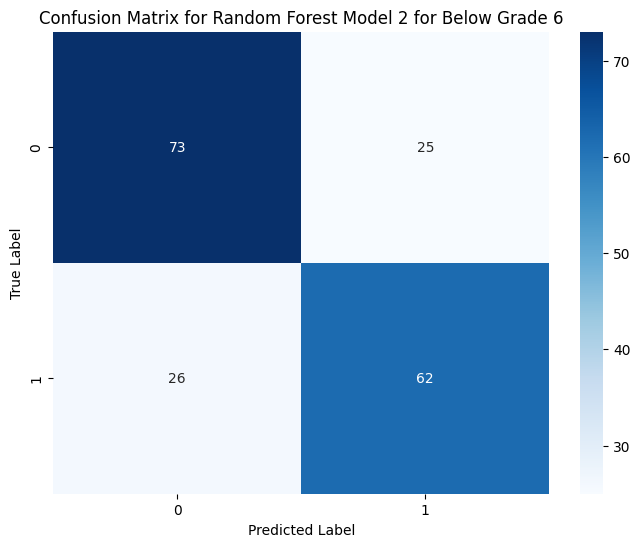

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred_1, labels=rf1.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf1.classes_, yticklabels=rf1.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Model 2 for Below Grade 6")
plt.show()

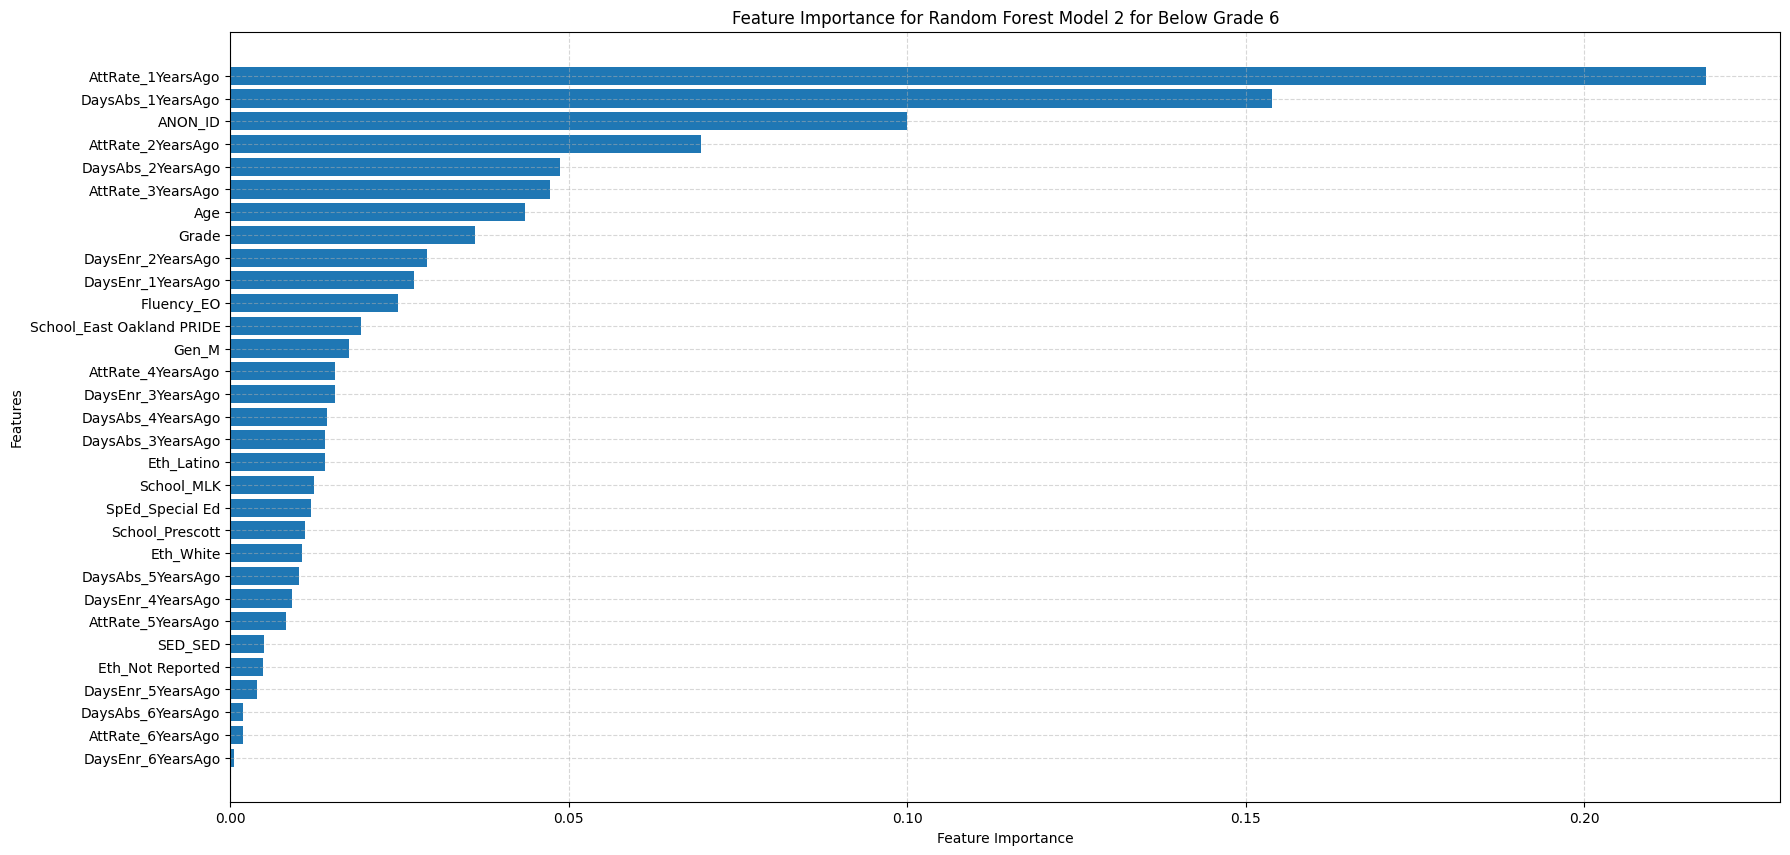

In [ ]:
# Plot feature importance
feature_importances = rf1.feature_importances_
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(20, 10))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Model 2 for Below Grade 6')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

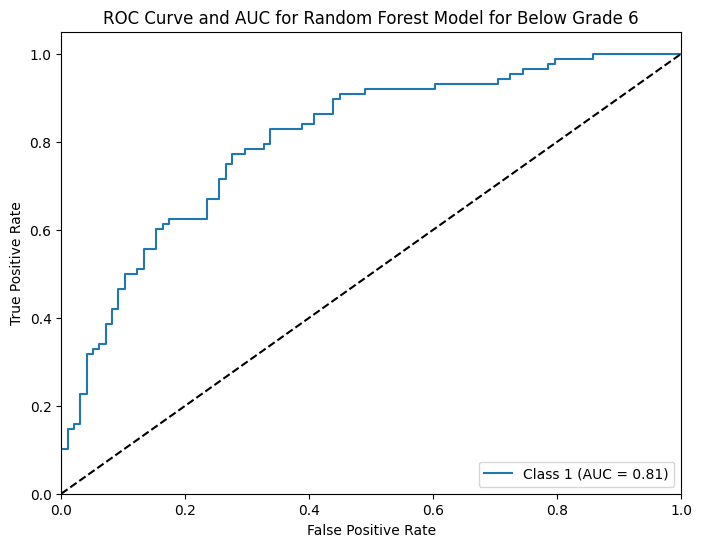

In [ ]:
# Plot AUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Compute FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(Y_test, Y_prob_1[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC for Random Forest Model for Below Grade 6')
plt.legend(loc="lower right")
plt.show()

# Above 6 Model

In [ ]:
above_6_X = above_6.drop(columns=['ChroAbs'])
above_6_Y = above_6['ChroAbs']
scaler = StandardScaler()
for col in [col for col in above_6_X.columns if col not in categorical_columns]:
  above_6_X[col] = scaler.fit_transform(above_6_X[[col]])
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(above_6_X, above_6_Y, test_size=0.2, random_state=42)

In [ ]:
above_6_X.shape

(2195, 57)

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth = 200, min_samples_leaf= 4, min_samples_split= 2, random_state=42)
rf2.fit(X_train_2, Y_train_2)
Y_pred_2 = rf2.predict(X_test_2)

Y_prob_2 = rf2.predict_proba(X_test_2)
print("Test Accuracy:", accuracy_score(Y_test_2, Y_pred_2))
print("\nClassification Report:\n", classification_report(Y_test_2, Y_pred_2))

Test Accuracy: 0.7972665148063781

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       209
           1       0.79      0.83      0.81       230

    accuracy                           0.80       439
   macro avg       0.80      0.80      0.80       439
weighted avg       0.80      0.80      0.80       439



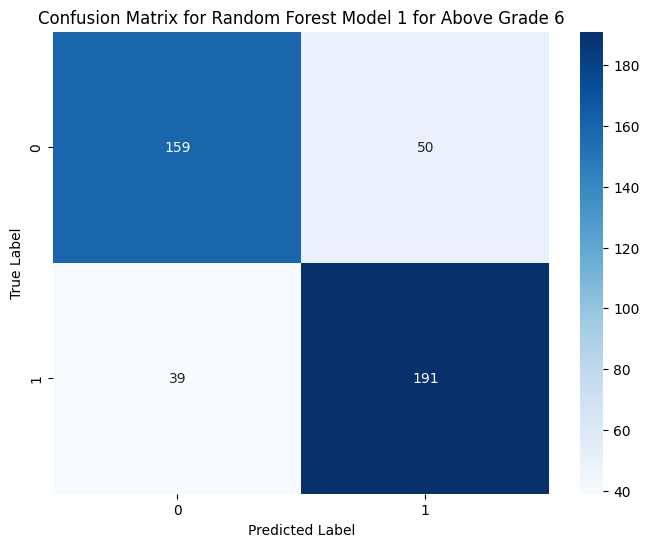

In [ ]:
conf_matrix = confusion_matrix(Y_test_2, Y_pred_2, labels=rf2.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf2.classes_, yticklabels=rf2.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Model 1 for Above Grade 6")
plt.show()

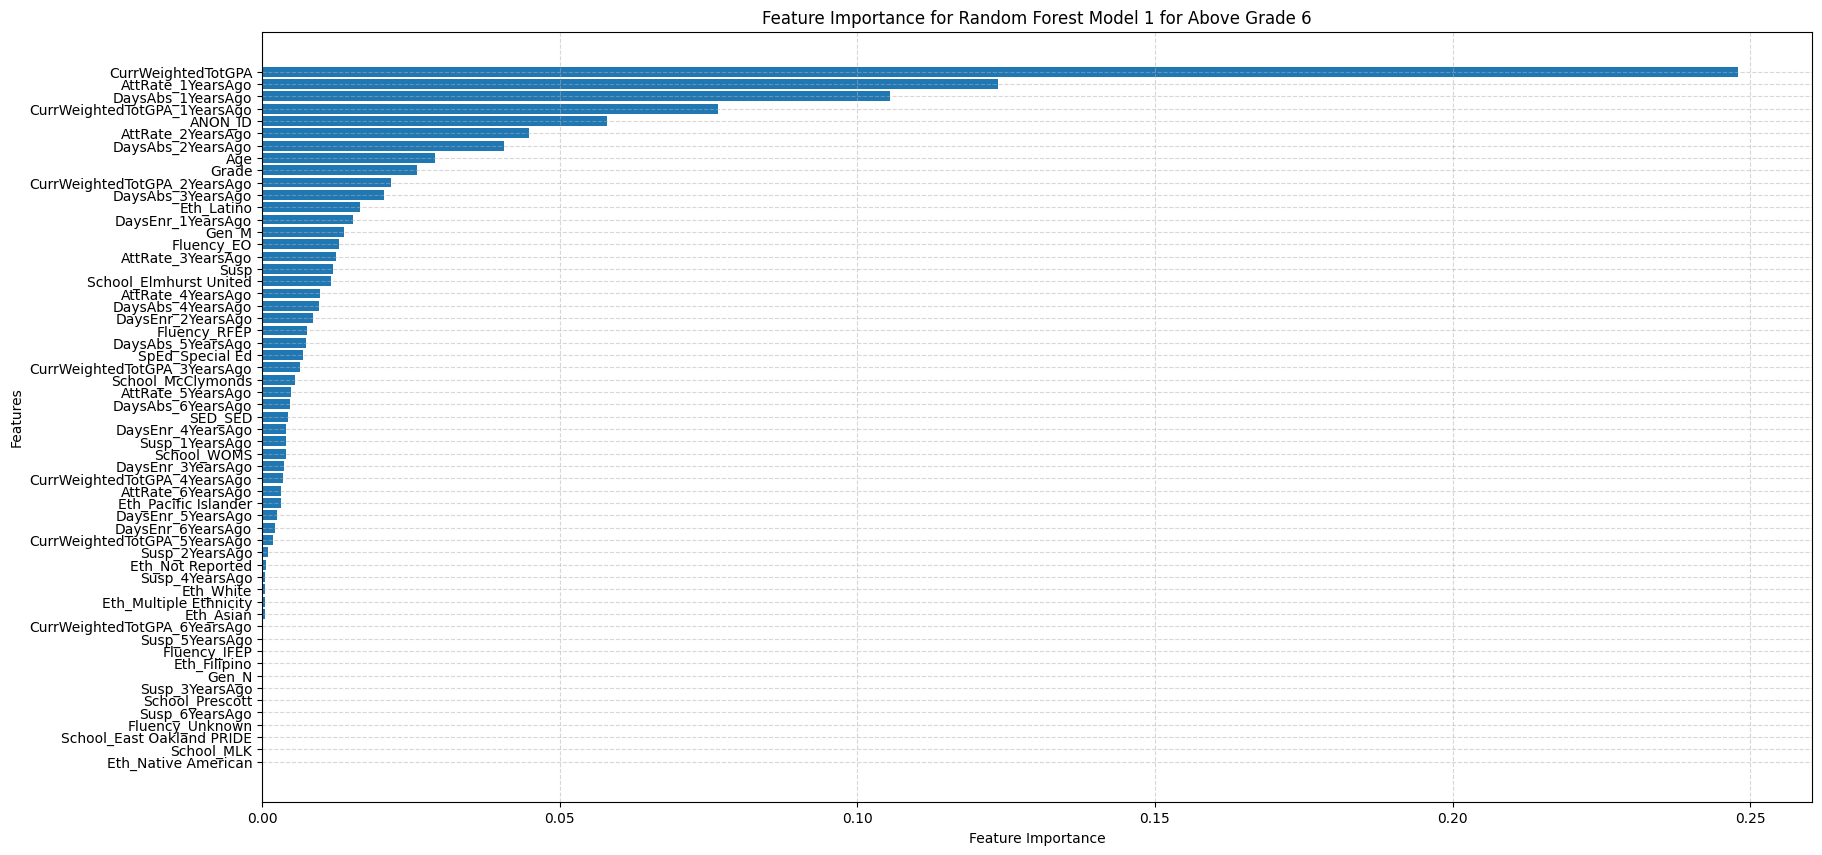

In [ ]:
# Plot feature importance
feature_importances = rf2.feature_importances_
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(20, 10))
plt.barh(range(X_train_2.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train_2.shape[1]), X_train_2.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Model 1 for Above Grade 6')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

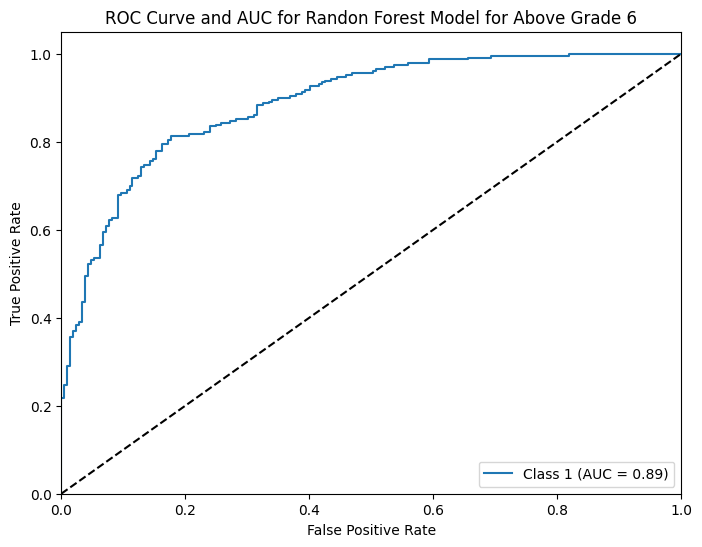

In [ ]:
# Compute FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(Y_test_2, Y_prob_2[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC for Randon Forest Model for Above Grade 6')
plt.legend(loc="lower right")
plt.show()

# Predicting 2024-2025 Chronic Absenteeism

Data Prep: Shift all the past data to 1 year. For example, `AttRate` in 23-24 now is `AttRate_1YearAgo`

In [ ]:
# include data in 2023-2024
merged_data.columns

Index(['ANON_ID', 'Birthdate', 'Grade', 'AttRate', 'DaysEnr', 'DaysAbs',
       'Susp', 'CurrWeightedTotGPA', 'Year', 'ChroAbs', 'Age',
       'AttRate_6YearsAgo', 'AttRate_5YearsAgo', 'AttRate_4YearsAgo',
       'AttRate_3YearsAgo', 'AttRate_2YearsAgo', 'AttRate_1YearsAgo',
       'DaysEnr_6YearsAgo', 'DaysEnr_5YearsAgo', 'DaysEnr_4YearsAgo',
       'DaysEnr_3YearsAgo', 'DaysEnr_2YearsAgo', 'DaysEnr_1YearsAgo',
       'DaysAbs_6YearsAgo', 'DaysAbs_5YearsAgo', 'DaysAbs_4YearsAgo',
       'DaysAbs_3YearsAgo', 'DaysAbs_2YearsAgo', 'DaysAbs_1YearsAgo',
       'Susp_6YearsAgo', 'Susp_5YearsAgo', 'Susp_4YearsAgo', 'Susp_3YearsAgo',
       'Susp_2YearsAgo', 'Susp_1YearsAgo', 'CurrWeightedTotGPA_6YearsAgo',
       'CurrWeightedTotGPA_5YearsAgo', 'CurrWeightedTotGPA_4YearsAgo',
       'CurrWeightedTotGPA_3YearsAgo', 'CurrWeightedTotGPA_2YearsAgo',
       'CurrWeightedTotGPA_1YearsAgo', 'Gen_M', 'Gen_N', 'Eth_Asian',
       'Eth_Filipino', 'Eth_Latino', 'Eth_Multiple Ethnicity',
       'Eth_Nat

In [ ]:
# Shift historical features directly in merged_data
feature_prefixes = ['AttRate', 'DaysEnr', 'DaysAbs', 'Susp', 'CurrWeightedTotGPA']
suffix = "YearsAgo"

merged_new = merged_data.copy()

# Shift features for each prefix
for prefix in feature_prefixes:
    for i in range(6, 0, -1):  # Shift from 6YearsAgo down to 1YearsAgo
        current_col = f"{prefix}_{i}{suffix}"
        next_col = f"{prefix}_{i+1}{suffix}" if i < 6 else None

        # Ensure current_col exists
        if current_col in merged_new.columns:
            # If next_col doesn't exist, create it with default value
            if next_col not in merged_new.columns and next_col is not None:
                merged_new[next_col] = 0

            # Perform the shift if next_col exists
            if next_col in merged_new.columns:
                merged_new[next_col] = merged_new[current_col]

# Update 1YearsAgo features with the current year's data
for prefix in feature_prefixes:
    current_col = f"{prefix}_1{suffix}"
    if prefix in merged_new.columns:  # Ensure current year's column exists
        merged_new[current_col] = merged_new[prefix]

# Display the updated column names
merged_new.columns


Index(['ANON_ID', 'Birthdate', 'Grade', 'AttRate', 'DaysEnr', 'DaysAbs',
       'Susp', 'CurrWeightedTotGPA', 'Year', 'ChroAbs', 'Age',
       'AttRate_6YearsAgo', 'AttRate_5YearsAgo', 'AttRate_4YearsAgo',
       'AttRate_3YearsAgo', 'AttRate_2YearsAgo', 'AttRate_1YearsAgo',
       'DaysEnr_6YearsAgo', 'DaysEnr_5YearsAgo', 'DaysEnr_4YearsAgo',
       'DaysEnr_3YearsAgo', 'DaysEnr_2YearsAgo', 'DaysEnr_1YearsAgo',
       'DaysAbs_6YearsAgo', 'DaysAbs_5YearsAgo', 'DaysAbs_4YearsAgo',
       'DaysAbs_3YearsAgo', 'DaysAbs_2YearsAgo', 'DaysAbs_1YearsAgo',
       'Susp_6YearsAgo', 'Susp_5YearsAgo', 'Susp_4YearsAgo', 'Susp_3YearsAgo',
       'Susp_2YearsAgo', 'Susp_1YearsAgo', 'CurrWeightedTotGPA_6YearsAgo',
       'CurrWeightedTotGPA_5YearsAgo', 'CurrWeightedTotGPA_4YearsAgo',
       'CurrWeightedTotGPA_3YearsAgo', 'CurrWeightedTotGPA_2YearsAgo',
       'CurrWeightedTotGPA_1YearsAgo', 'Gen_M', 'Gen_N', 'Eth_Asian',
       'Eth_Filipino', 'Eth_Latino', 'Eth_Multiple Ethnicity',
       'Eth_Nat

In [ ]:
merged_new['AttRate_1YearsAgo'], merged_data['AttRate']

(0       0.8444
 1       0.5443
 2       0.8889
 3       0.8833
 4       0.9444
          ...  
 3119    0.9611
 3120    0.6222
 3121    0.9441
 3122    0.9333
 3123    0.7375
 Name: AttRate_1YearsAgo, Length: 3124, dtype: float64,
 0       0.8444
 1       0.5443
 2       0.8889
 3       0.8833
 4       0.9444
          ...  
 3119    0.9611
 3120    0.6222
 3121    0.9441
 3122    0.9333
 3123    0.7375
 Name: AttRate, Length: 3124, dtype: float64)

## Below 6 24-25 Predictions

In [ ]:
columns_to_drop = ['Birthdate', 'Year', 'AttRate', 'DaysEnr', 'DaysAbs']
# Drop all columns containing 'CurrWeightedTotGPA' for below_6
below_6_2425 = merged_new[merged_new['Grade'] < 6].drop(
    columns=[col for col in merged_new.columns if 'CurrWeightedTotGPA' in col]
+ columns_to_drop)

# Keep all columns for above_6
above_6_2425 = merged_new[merged_new['Grade'] >= 6].drop(columns=columns_to_drop)

below_6_2425.columns

Index(['ANON_ID', 'Grade', 'Susp', 'ChroAbs', 'Age', 'AttRate_6YearsAgo',
       'AttRate_5YearsAgo', 'AttRate_4YearsAgo', 'AttRate_3YearsAgo',
       'AttRate_2YearsAgo', 'AttRate_1YearsAgo', 'DaysEnr_6YearsAgo',
       'DaysEnr_5YearsAgo', 'DaysEnr_4YearsAgo', 'DaysEnr_3YearsAgo',
       'DaysEnr_2YearsAgo', 'DaysEnr_1YearsAgo', 'DaysAbs_6YearsAgo',
       'DaysAbs_5YearsAgo', 'DaysAbs_4YearsAgo', 'DaysAbs_3YearsAgo',
       'DaysAbs_2YearsAgo', 'DaysAbs_1YearsAgo', 'Susp_6YearsAgo',
       'Susp_5YearsAgo', 'Susp_4YearsAgo', 'Susp_3YearsAgo', 'Susp_2YearsAgo',
       'Susp_1YearsAgo', 'Gen_M', 'Gen_N', 'Eth_Asian', 'Eth_Filipino',
       'Eth_Latino', 'Eth_Multiple Ethnicity', 'Eth_Native American',
       'Eth_Not Reported', 'Eth_Pacific Islander', 'Eth_White', 'Fluency_EO',
       'Fluency_IFEP', 'Fluency_RFEP', 'Fluency_Unknown', 'SpEd_Special Ed',
       'SED_SED', 'School_East Oakland PRIDE', 'School_Elmhurst United',
       'School_MLK', 'School_McClymonds', 'School_Prescott',

In [ ]:
X_2425 = below_6_2425.drop(columns=['ChroAbs'])

scaler = StandardScaler()
for col in [col for col in X_2425.columns if col not in categorical_columns]:
  X_2425[col] = scaler.fit_transform(X_2425[[col]])
X_2425.drop(columns=below_6_drop, inplace=True)

In [ ]:
# below_6_2425.head()

In [ ]:
model_1_pred = rf1.predict(X_2425)
model_1_prob = rf1.predict_proba(X_2425)

In [ ]:
results = below_6_2425.copy()
results['ChroAbs 2425 pred'] = model_1_pred
# results.head()

## Above 6 24-25 Predictions

In [ ]:
X_2425_2 = above_6_2425.drop(columns=['ChroAbs'])

scaler = StandardScaler()
for col in [col for col in X_2425_2.columns if col not in categorical_columns]:
  X_2425_2[col] = scaler.fit_transform(X_2425_2[[col]])

In [ ]:
model_2_pred = rf2.predict(X_2425_2)
model_2_prob = rf2.predict_proba(X_2425_2)

# 24-25 Predictions Analysis

Create a dataframe with all prediction in 2023-2024 and 2024-2025 with original data

In [ ]:
below_6['2324 pred'] = rf1.predict(below_6_X)
above_6['2324 pred'] = rf2.predict(above_6_X)
# Combine predictions from below_6 and above_6
combined_predictions = pd.concat([
    below_6[['ANON_ID', '2324 pred']],
    above_6[['ANON_ID', '2324 pred']]
], axis=0)

# Rename the prediction column for clarity
combined_predictions.rename(columns={'2324 pred': 'ChroAbs 2324 pred'}, inplace=True)

# Merge predictions into data_23_24 based on ANON_ID
data_with_pred = data_23_24.merge(
    combined_predictions,
    on='ANON_ID',
    how='left'
)
# data_with_pred.head()

In [ ]:
results_2 = above_6_2425.copy()
results_2['ChroAbs 2425 pred'] = model_2_pred
results_2.shape

(2195, 59)

In [ ]:

# Combine predictions from below_6 and above_6
combined_predictions_2425 = pd.concat([
    results[['ANON_ID', 'ChroAbs 2425 pred']],
    results_2[['ANON_ID', 'ChroAbs 2425 pred']]
], axis=0)



# Merge predictions into data_23_24 based on ANON_ID
data_with_pred = data_with_pred.merge(
    combined_predictions_2425,
    on='ANON_ID',
    how='left'
)
data_with_pred.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,ChroAbs,Age,ChroAbs 2324 pred,ChroAbs 2425 pred
0,106,2008-03-03,F,White,EL,Not Special Ed,10,0.8444,180.0,28.0,1.0,3.75,SED,Castlemont,23-24,1,15,1,1
1,118,2008-03-03,F,White,EL,Not Special Ed,10,0.5443,158.0,72.0,0.0,3.13,SED,Castlemont,23-24,1,15,1,1
2,119,2009-08-18,F,White,EL,Not Special Ed,9,0.8889,180.0,20.0,0.0,3.13,SED,Castlemont,23-24,1,14,1,1
3,160,2009-07-29,F,African American,EO,Not Special Ed,9,0.8833,180.0,21.0,0.0,2.75,SED,Castlemont,23-24,1,14,1,1
4,276,2007-12-24,M,African American,EO,Not Special Ed,11,0.9444,180.0,10.0,0.0,3.00,SED,Castlemont,23-24,0,16,0,0


In [ ]:
# data_23_24[data['AttRate'] ==0]

In [ ]:
# Look at prediction not not the same as 2324 predict and true label of 2324 and actual label for 23-24 is 0
data_with_pred[(data_with_pred['ChroAbs 2425 pred'] != data_with_pred['ChroAbs']) &
 (data_with_pred['ChroAbs 2425 pred'] != data_with_pred['ChroAbs 2324 pred'])&
               (data_with_pred['ChroAbs'] == 0)]

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,ChroAbs,Age,ChroAbs 2324 pred,ChroAbs 2425 pred
104,10750,2008-10-11,F,Latino,RFEP,Not Special Ed,9,1.0000,16.0,0.0,0.0,0.00,SED,Castlemont,23-24,0,15,0,1
169,15595,2007-01-23,F,Latino,EL,Not Special Ed,11,0.9056,180.0,17.0,0.0,1.50,SED,Castlemont,23-24,0,16,0,1
170,15603,2006-04-15,F,Latino,EL,Not Special Ed,10,0.9000,180.0,18.0,0.0,2.38,SED,Castlemont,23-24,0,17,0,1
226,20213,2008-05-08,M,Latino,RFEP,Not Special Ed,10,0.9000,180.0,18.0,0.0,2.13,SED,Castlemont,23-24,0,15,0,1
313,26338,2008-08-06,M,Latino,RFEP,Not Special Ed,9,1.0000,17.0,0.0,0.0,0.00,SED,Castlemont,23-24,0,15,0,1
392,34849,2008-04-12,M,Latino,EL,Not Special Ed,9,0.9000,180.0,18.0,0.0,1.86,SED,Castlemont,23-24,0,15,0,1
513,47225,2007-01-29,M,Latino,EL,Not Special Ed,10,0.9111,180.0,16.0,0.0,2.25,SED,Castlemont,23-24,0,16,0,1
558,50760,2009-06-08,M,Multiple Ethnicity,EO,Not Special Ed,9,0.9278,180.0,13.0,0.0,2.25,SED,Castlemont,23-24,0,14,0,1
559,50761,2009-06-08,M,Multiple Ethnicity,EO,Not Special Ed,9,0.9278,180.0,13.0,0.0,2.25,SED,Castlemont,23-24,0,14,0,1
657,58753,2007-03-12,M,Latino,RFEP,Not Special Ed,11,0.9000,180.0,18.0,0.0,1.83,SED,Castlemont,23-24,0,16,0,1


In [ ]:
report = data_with_pred[['ANON_ID','School','ChroAbs 2425 pred']]
report.to_csv('/content/drive/MyDrive/ONGB_Wizearly 2024 Fall Interns /ONGB_Wizearly Interns B/Dinh_Lan/prediction_report.csv')